In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns

In [29]:
N = 10
p = 0.05  # probability of connection between i,j: i-->j
adj_matrix = bernoulli.rvs(p, size=(N,N))
np.fill_diagonal(adj_matrix, 0)
print(adj_matrix)

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


<AxesSubplot:>

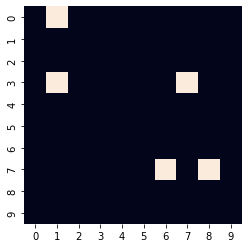

In [30]:
sns.heatmap(adj_matrix, cbar=False, square=True)

In [31]:
adj_list = {ni: np.where(neighbors)[0] for ni, neighbors in enumerate(adj_matrix)}
adj_list

{0: array([1]),
 1: array([], dtype=int64),
 2: array([], dtype=int64),
 3: array([1, 7]),
 4: array([], dtype=int64),
 5: array([], dtype=int64),
 6: array([], dtype=int64),
 7: array([6, 8]),
 8: array([], dtype=int64),
 9: array([], dtype=int64)}

In [32]:
[(node, neighbor) for node in adj_list for neighbor in adj_list[node]]

[(0, 1), (3, 1), (3, 7), (7, 6), (7, 8)]

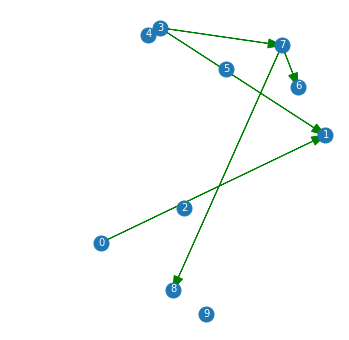

In [33]:
def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

x = np.random.random(size=N)*2  # uniform distribution
y = np.random.random(size=N)*2

plt.figure(figsize=(6,6))
plt.plot(x, y, '.', ms=30)
l = plt.xlim(-0.1,2.1)
l = plt.ylim(-0.1,2.1)
plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
e = [draw_edge([x[a], y[a]], [x[b], y[b]], 0.06) for a in adj_list for b in adj_list[a]]

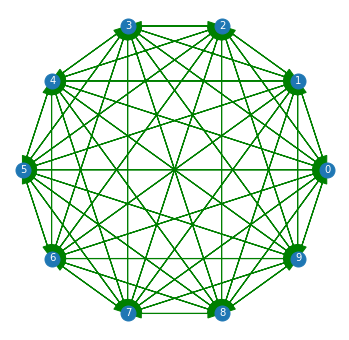

In [7]:
def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

t = np.linspace(0, 2*np.pi, N, endpoint=False)

x = np.cos(t)
y = np.sin(t)

plt.figure(figsize=(6,6))
plt.plot(x, y, '.', ms=30)
plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
e = [draw_edge([x[a], y[a]], [x[b], y[b]], 0.06) for a in adj_list for b in adj_list[a]]

In [8]:
N = 10
K = 4

Ring = []
for i in range(N):
    Ring += [[]]
    for k in range(K//2):
        Ring[i] += [i-(k+1), i+(k+1)]
Ring = np.array(Ring)
pos = np.where(Ring < 0)
Ring[pos] = Ring[pos] + N
pos = np.where(Ring >= N)
Ring[pos] = Ring[pos] - N
Ring

array([[9, 1, 8, 2],
       [0, 2, 9, 3],
       [1, 3, 0, 4],
       [2, 4, 1, 5],
       [3, 5, 2, 6],
       [4, 6, 3, 7],
       [5, 7, 4, 8],
       [6, 8, 5, 9],
       [7, 9, 6, 0],
       [8, 0, 7, 1]])

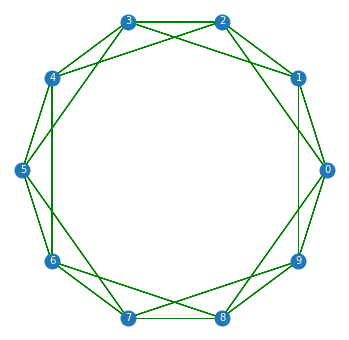

In [9]:
adj_list = {ni: neighbors for ni, neighbors in enumerate(Ring)}

t = np.linspace(0, 2*np.pi, N, endpoint=False)

x = np.cos(t)
y = np.sin(t)

plt.figure(figsize=(6,6))
plt.plot(x, y, '.', ms=30)
plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
e = [draw_edge([x[a], y[a]], [x[b], y[b]], 0) for a in adj_list for b in adj_list[a]]

In [10]:
adj_matrix = np.zeros((N, N), dtype='int')

for node in adj_list:
    for neighbor in adj_list[node]:
        adj_matrix[node, neighbor] = 1
adj_matrix

array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

<AxesSubplot:>

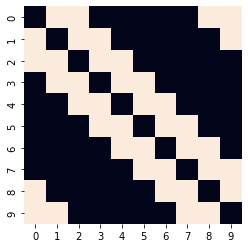

In [11]:
sns.heatmap(adj_matrix, cbar=False, square=True)

# TO DO

- Plot the Ring Matrix using seaborn, sns
- Try to implement a 1D small-world (Watts-Strogatz)
- Review the class materials, week 1 and 2.

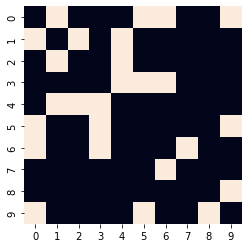

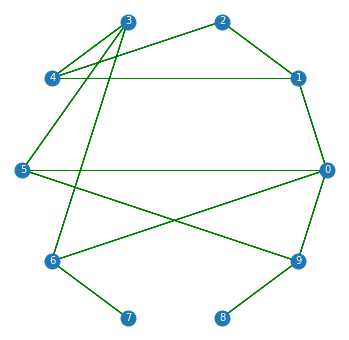

In [73]:
def make_er_directed(N, p):
    # N: nodes, p: probability of connection, returns C adj_matrix
    C = np.zeros((N, N), dtype='int')
    for i in range(N):
        for j in range(i+1, N):
            C[i, j] = bernoulli.rvs(p)

    C = C + np.transpose(C)
    
    return C

C = make_er_directed(N, 0.2)

sns.heatmap(C, cbar=False, square=True)

adj_list = {node: np.where(neighbors)[0] for node, neighbors in enumerate(C)}

plot_circular_layout(adj_list)

array([[9, 1, 8, 2],
       [0, 2, 9, 3],
       [1, 3, 0, 4],
       [2, 4, 1, 5],
       [3, 5, 2, 6],
       [4, 6, 3, 7],
       [5, 7, 4, 8],
       [6, 8, 5, 9],
       [7, 9, 6, 0],
       [8, 0, 7, 1]])

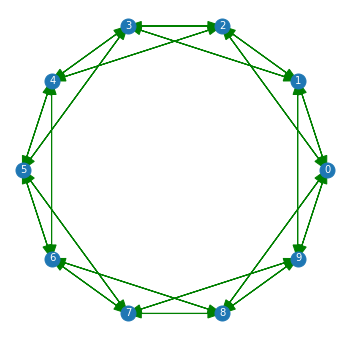

In [237]:
def draw_edge(a, b, ni, nj, hw=0, color='green'):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):

    t = np.linspace(0, 2*np.pi, N, endpoint=False)

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, hw) 
         for a in adj_list for b in adj_list[a] if len(adj_list[a])]
    
    if rewired_arcs is not None:
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, 0.06, color="red") 
         for a in rewired_arcs for b in rewired_arcs[a] if len(rewired_arcs[a])]
    
def make_ring(N, K):
    Ring = []
    for i in range(N):
        Ring += [[]]
        for k in range(K//2):
            Ring[i] += [i-(k+1), i+(k+1)]
    Ring = np.array(Ring)
    pos = np.where(Ring < 0)
    Ring[pos] = Ring[pos] + N
    pos = np.where(Ring >= N)
    Ring[pos] = Ring[pos] - N
    return Ring

def make_er_undirected(N, p):
    # N: nodes, p: probability of connection, returns C adj_matrix
    C = np.zeros((N, N), dtype='int')
    for i in range(N):
        for j in range(i+1, N):
            C[i, j] = bernoulli.rvs(p)

    C = C + np.transpose(C)
    
    return C


# Undirected Erdos-Renyi
#adj_list = {node: np.where(neighbors)[0] for node, neighbors in enumerate(make_er_undirected(N, 0.2))}

# Regular ring
C = make_ring(N, 4) 
adj_list = {node: neighbors for node, neighbors in enumerate(C)}

plot_circular_layout(adj_list, hw=0.06)
C

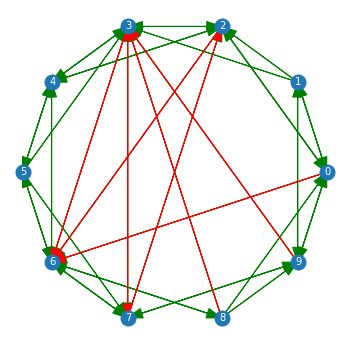

In [238]:
def rewire_connections(C, omega=0.0):
    all_nodes = set(range(len(C)))
    for i, ci in enumerate(C):
        for j, cj in enumerate(ci):
            if np.random.random() < omega:
                available_nodes = list(all_nodes - (set([i] + list(ci)) - set([cj])))[1:]
                C[i, j] = np.random.choice(available_nodes)

C = make_ring(N, 4)

rewire_connections(C, 0.25)

adj_list = {node: neighbors for node, neighbors in enumerate(C)}

R = make_ring(N, 4)

rewired_arcs = {i: list(set(C[i])-set(R[i])) for i in range(N)}

plot_circular_layout(adj_list, hw=0.065, rewired_arcs=rewired_arcs)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

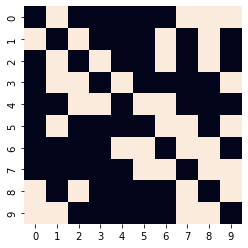

In [201]:
adj_matrix = np.zeros((N, N), dtype='int')
for node, neighbors in enumerate(C):
    for ki in neighbors:
        adj_matrix[node, ki] = 1
sns.heatmap(adj_matrix, cbar=False, square=True)
adj_matrix.sum(axis=1)

In [202]:
adj_matrix.sum(axis=0)

array([3, 5, 4, 2, 2, 3, 5, 5, 6, 5])